In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


In [8]:
# Merge transactions with products to include Price
merged = pd.merge(transactions, products, on="ProductID", how="left")
merged = pd.merge(merged, customers, on="CustomerID", how="left")

# Check for missing columns
if 'Price' not in merged.columns:
    print("Error: 'Price' column is missing in the merged dataset.")
else:
    # Calculate TotalValue
    merged['TotalValue'] = merged['Price'] * merged['TransactionID'].map(
        merged['TransactionID'].value_counts()
    )

print(merged.head())

Error: 'Price' column is missing in the merged dataset.
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Reg

In [9]:
customer_spend = merged.groupby('CustomerID')['TotalValue'].sum().reset_index()
region_sales = merged.groupby('Region')['TotalValue'].sum().reset_index()
product_sales = merged.groupby('ProductName')['TotalValue'].sum().reset_index()

C:\Users\amanb\AppData\Local\Temp\ipykernel_5024\2635057917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region', y='TotalValue', palette='viridis')


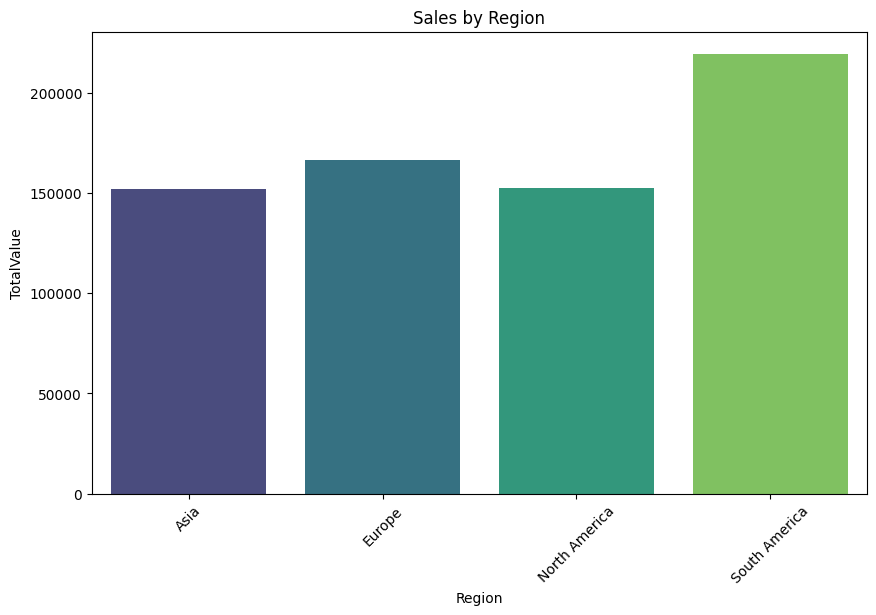

In [10]:
# Visualizations
# 1. Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x='Region', y='TotalValue', palette='viridis')
plt.title("Sales by Region")
plt.xticks(rotation=45)
plt.show()

C:\Users\amanb\AppData\Local\Temp\ipykernel_5024\2549809739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='plasma')


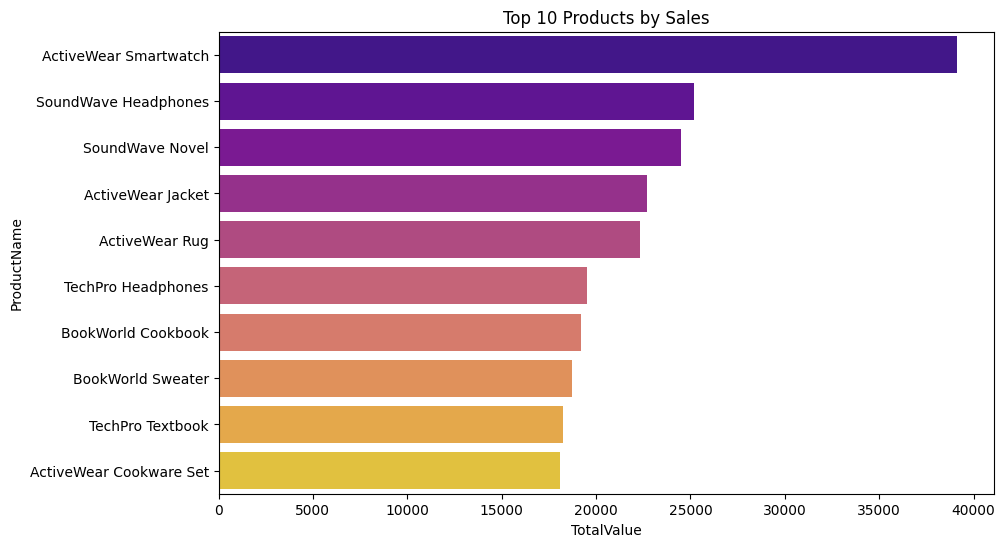

In [11]:
# 2. Top 10 Products by Sales
top_products = product_sales.nlargest(10, 'TotalValue')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='plasma')
plt.title("Top 10 Products by Sales")
plt.show()

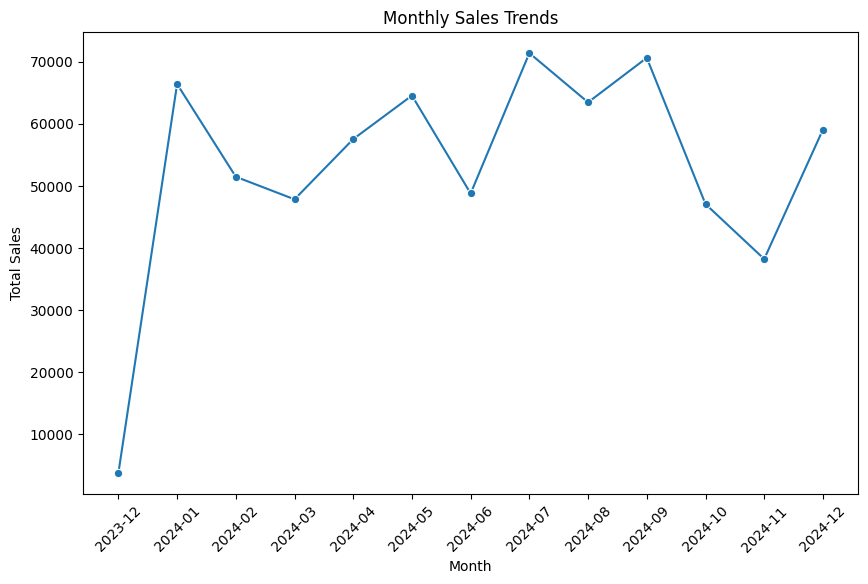

In [ ]:
# 3. Monthly Sales Trends
# Convert 'TransactionDate' to datetime format if not already
merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])

# Extract 'TransactionMonth' and convert to strings for plotting
merged['TransactionMonth'] = merged['TransactionDate'].dt.to_period('M').astype(str)

# Group by month and calculate total sales
monthly_sales = merged.groupby('TransactionMonth')['TotalValue'].sum().reset_index()

# Plot monthly sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='TransactionMonth', y='TotalValue', marker='o')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


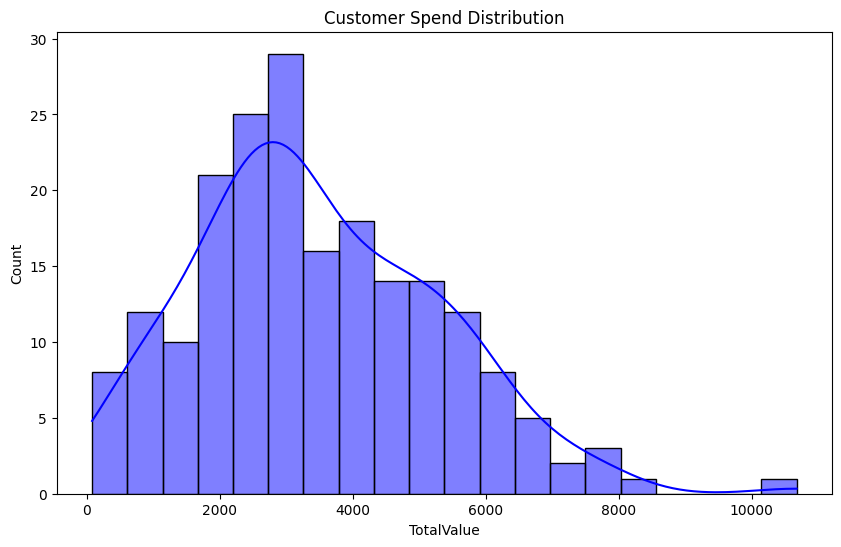

In [14]:
# 4. Customer Spend Distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_spend['TotalValue'], bins=20, kde=True, color='blue')
plt.title("Customer Spend Distribution")
plt.show()

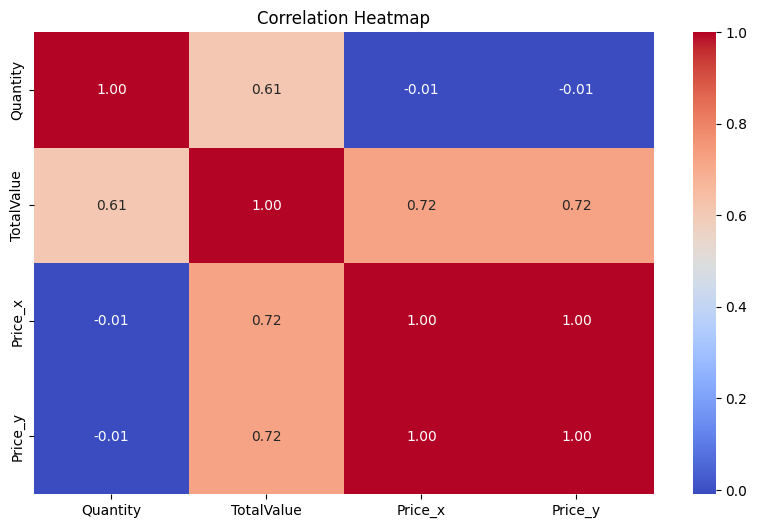

In [17]:
# 5. Correlation Heatmap# Select only numeric columns for correlation
numeric_cols = merged.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# Save cleaned data
merged.to_csv("Merged_Cleaned.csv", index=False)